In [1]:
import numpy as np
import networkx as nx
from scipy.integrate import quad
import scipy.linalg as la
from matplotlib import pyplot as plt
import functions as f
import graphs as g
import random, time, math, json

In [2]:
readWSmodels = nx.read_gpickle("models_17102020")

In [3]:
eps=1e-10
N_p = 50
p = np.round(np.linspace(0.02, 1, num = N_p),2)
n = 300
k = 10
p0 = 0.1
replicates = 100

In [4]:
#Eigen-decomposition of G(p0)
eps=1e-10
A_p0, D_p0 = f.adj_degree_matrices(readWSmodels['G_p0'])
vol_V = sum(sum(D_p0))
L_p0 = D_p0 - A_p0
eigenvalues_p0, eigenvectors_p0 = la.eig(L_p0)
sort_eigenv_p0 = f.sort_eigenv(eigenvalues_p0, eigenvectors_p0)
print(f'Eigen-decomposition of reference model with rewiring prob p : {p0} completed.')

Eigen-decomposition of reference model with rewiring prob p : 0.1 completed.


In [5]:
# Eigen-decomposition of G(p)
tic = time.time() 
times, A_dic, CTD_eigenv_dic = f.eigen_decomp_WS_models(readWSmodels['G_p'],
                                                        replicates, 
                                                        solve = "standard_L",
                                                        ctd = False)
tac = time.time() 
time_minutes = (tac - tic)/60
mean_time_p = np.mean([np.mean(times[keys]) for keys in times.keys()])
print(f'Eigen-decomposition of the {replicates * len(p)} WS models completed.')
print(f'took {np.round(time_minutes, 3)} minutes, with an average' \
      f'of {np.round(mean_time_p, 3)} per rewiring probability')

Eigen-decomposition of the 5000 WS models completed.
took 5.332 minutes, with an averageof 0.054 per rewiring probability


# Hamming Distance

In [6]:
tic = time.time() 
haming_distance_dic = f.hamming_dist_models(A_p0, A_dic, replicates) 
tac = time.time() 
time_minutes = (tac - tic)/60
print(f'Hamming Distance Between G(p0) and G(p) corresponding to' \
      f' the {len(p)} rewiring p and {replicates} replicates')
print(f'{len(p) * replicates} models')
print(f'Process took {time_minutes} minutes')
mean_hamming_dist = [np.mean(haming_distance_dic[ps]) for ps in p]

Hamming Distance Between G(p0) and G(p) corresponding to the 50 rewiring p and 100 replicates
5000 models
Process took 0.09515642325083415 minutes


## SGD wrt spectrum of Unnormalized Graph Laplacian $L$

In [7]:
print('The spectral distance between G(p0) and G(p) is an average  ' \
    f'of the SGD between G(p0) and the {replicates} replicate models ' \
      f'generated per each of the {len(p)} rewiring probability.')
tic = time.time() 
time_dist, spectral_distance_p0_p = f.spectral_distance(sort_eigenv_p0, CTD_eigenv_dic, replicates)
tac = time.time()
time_minutes = (tac - tic)/60
print(f'Process took {time_minutes} minutes with an average of {np.mean(time_dist)} per p')

The spectral distance between G(p0) and G(p) is an average  of the SGD between G(p0) and the 100 replicate models generated per each of the 50 rewiring probability.
d(G(0.1), G(0.02)): 0.0550905251710191, took: 11.8506 minutes
d(G(0.1), G(0.04)): 0.05155126805638598, took: 13.1093 minutes
d(G(0.1), G(0.06)): 0.050384543735345885, took: 11.2703 minutes
d(G(0.1), G(0.08)): 0.049383031965991364, took: 10.4744 minutes
d(G(0.1), G(0.1)): 0.049306254545669545, took: 10.4829 minutes
d(G(0.1), G(0.12)): 0.049693613943612436, took: 10.5253 minutes
d(G(0.1), G(0.14)): 0.049840085994532275, took: 10.5306 minutes
d(G(0.1), G(0.16)): 0.05021720216632218, took: 10.4662 minutes
d(G(0.1), G(0.18)): 0.05041386882732698, took: 10.4694 minutes
d(G(0.1), G(0.2)): 0.050930588584565076, took: 10.4721 minutes
d(G(0.1), G(0.22)): 0.05063456891606199, took: 10.9342 minutes
d(G(0.1), G(0.24)): 0.051229777211238635, took: 11.3685 minutes
d(G(0.1), G(0.26)): 0.051438382984133085, took: 11.3008 minutes
d(G(0.1), G

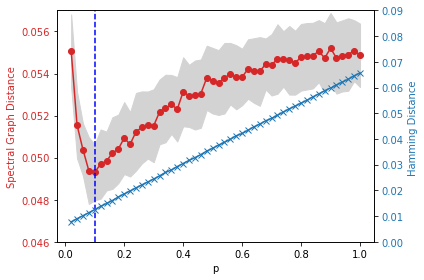

In [8]:
mean_list= [np.mean(spectral_distance_p0_p[i]) for i in p]
std_list = [np.std(spectral_distance_p0_p[i]) for i in p]

f.savage_plot(mean_list, p,  p0, std_list, mean_hamming_dist, [0.046,0.057], [0,0.09])

## SGD wrt spectrum of Normalized Graph Laplacian $L_{sym}$

In [9]:
#Eigen-decomposition of G(p0)

D_invsq = np.diag(1/np.sqrt(np.diag(D_p0)))
L_sym_p0 = np.eye(D_p0.shape[0]) - np.dot(D_invsq, A_p0).dot(D_invsq)

eigenvalues_Lsym, eigenvectors_Lsym = la.eig(L_sym_p0)
sort_eigenv_p0_Lsym = f.sort_eigenv(eigenvalues_Lsym, eigenvectors_Lsym)
print(f'Eigen-decomposition of reference model - in terms of L_sym - with rewiring prob p : {p0} completed.')

Eigen-decomposition of reference model - in terms of L_sym - with rewiring prob p : 0.1 completed.


In [10]:
# Eigen-decomposition of G(p) in terms of Lsym
tic = time.time() 
times_Lsym, A_dic_Lsym, eigenv_dic_Lsym = f.eigen_decomp_WS_models(readWSmodels['G_p'],
                                                                     replicates, solve = "standard_Lsym")
tac = time.time() 
time_minutes = (tac - tic)/60
mean_time_p_Lsym = np.mean([np.mean(times_Lsym[keys]) for keys in times_Lsym.keys()])
print(f'Eigen-decomposition - in terms of L_sym - of the {replicates * len(p)} WS models completed.')
print(f'took {np.round(time_minutes, 3)} minutes, with an average' \
      f' of {np.round(mean_time_p_Lsym,3)} minutes per rewiring probability')

Eigen-decomposition - in terms of L_sym - of the 5000 WS models completed.
took 6.888 minutes, with an average of 0.073 minutes per rewiring probability


In [13]:
print('The spectral distance between G(p0) and G(p) is an average  ' \
    f'of the SGD between G(p0) and the {replicates} replicate models - in terms of L_sym -' \
      f'generated per each of the {len(p)} rewiring probability.')
tic = time.time() 
time_dist_Lsym, spectral_distance_p0_p_Lsym = f.spectral_distance(sort_eigenv_p0_Lsym, 
                                                              eigenv_dic_Lsym, replicates)
tac = time.time()
time_minutes = (tac - tic)/60
print(f'Process took {time_minutes} minutes with an average of {np.mean(time_dist_Lsym)} per p')

The spectral distance between G(p0) and G(p) is an average  of the SGD between G(p0) and the 100 replicate models - in terms of L_sym -generated per each of the 50 rewiring probability.
d(G(0.1), G(0.02)): 0.04548536174520637, took: 11.224 minutes
d(G(0.1), G(0.04)): 0.04230605833375077, took: 11.158 minutes
d(G(0.1), G(0.06)): 0.04088524812842784, took: 12.27 minutes
d(G(0.1), G(0.08)): 0.040133052707511274, took: 13.2405 minutes
d(G(0.1), G(0.1)): 0.039856745309123705, took: 10.8197 minutes
d(G(0.1), G(0.12)): 0.03973796993845339, took: 10.6162 minutes
d(G(0.1), G(0.14)): 0.040021870411102965, took: 22.4383 minutes
d(G(0.1), G(0.16)): 0.04044686638964488, took: 26.3028 minutes
d(G(0.1), G(0.18)): 0.040206048739331826, took: 10.7127 minutes
d(G(0.1), G(0.2)): 0.04049969454734589, took: 12.44 minutes
d(G(0.1), G(0.22)): 0.040501426086798346, took: 10.6639 minutes
d(G(0.1), G(0.24)): 0.040881712879150094, took: 10.6226 minutes
d(G(0.1), G(0.26)): 0.04092989674480546, took: 11.3833 minut

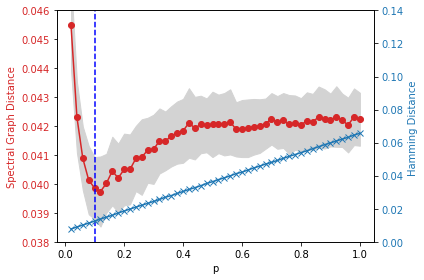

In [109]:
mean_list_Lsym = [np.mean(spectral_distance_p0_p_Lsym[i]) for i in p]
std_list_Lsym = [np.std(spectral_distance_p0_p_Lsym[i]) for i in p]

f.savage_plot(mean_list_Lsym, p,  p0, std_list_Lsym, mean_hamming_dist, [0.038,0.046], [0,0.14])

## SGD wrt the spectrum of the Normalized Graph Laplacian $L_{sym}$ and eigenvectors as the commute time distance.

In [47]:
#Eigen-decomposition of G(p0)

eigenvalues_Lsym, eigenvectors_Lsym = la.eig(L_sym_p0)
sort_eigenv_p0_Lsym_ctd = f.CTD_eigenv(vol_V, 
                                   f.sort_eigenv(eigenvalues_Lsym, eigenvectors_Lsym),
                                   D_p0, eps) 

print(f'Eigen-decomposition of reference model - in terms of L_sym, ctd - with rewiring prob p : {p0} completed.')

Eigen-decomposition of reference model - in terms of L_sym, ctd - with rewiring prob p : 0.1 completed.


In [49]:
# Eigen-decomposition of G(p) in terms of Lsym
tic = time.time() 
times_Lsym_ctd, A_dic_Lsym_ctd, eigenv_dic_Lsym_ctd = eigen_decomp_WS_models(readWSmodels['G_p'],
                                                                               replicates, 
                                                                               solve = "standard_Lsym",
                                                                               ctd = True)
tac = time.time() 
time_minutes = (tac - tic)/60
mean_time_p_Lsym_ctd = np.mean([np.mean(times_Lsym_ctd[keys]) for keys in times_Lsym_ctd.keys()])
print(f'Eigen-decomposition - in terms of L_sym - of the {replicates * len(p)} WS models completed.')
print(f'took {np.round(time_minutes, 3)} minutes, with an average' \
      f' of {np.round(mean_time_p_Lsym_ctd,3)} minutes per rewiring probability')

Eigen-decomposition - in terms of L_sym - of the 5000 WS models completed.
took 7.675 minutes, with an average of 0.082 minutes per rewiring probability


In [50]:
print('The spectral distance between G(p0) and G(p) is an average  ' \
    f'of the SGD between G(p0) and the {replicates} replicate models - in terms of L_sym ctd -' \
      f'generated per each of the {len(p)} rewiring probability.')
tic = time.time() 
time_dist_Lsym_ctd, spectral_distance_p0_p_Lsym_ctd = f.spectral_distance(sort_eigenv_p0_Lsym_ctd, 
                                                              eigenv_dic_Lsym_ctd, replicates)
tac = time.time()
time_minutes = (tac - tic)/60
print(f'Process took {time_minutes} minutes with an average of {np.mean(time_dist_Lsym_ctd)} per p')

The spectral distance between G(p0) and G(p) is an average  of the SGD between G(p0) and the 100 replicate models - in terms of L_sym ctd -generated per each of the 50 rewiring probability.
d(G(0.1), G(0.02)): 0.045764708070906865, took: 11.6898 minutes
d(G(0.1), G(0.04)): 0.04283092031329963, took: 11.3142 minutes
d(G(0.1), G(0.06)): 0.041379917049712035, took: 11.4013 minutes
d(G(0.1), G(0.08)): 0.040576739932316704, took: 11.0255 minutes
d(G(0.1), G(0.1)): 0.040503283273679795, took: 10.8994 minutes
d(G(0.1), G(0.12)): 0.040375156649738, took: 11.1964 minutes
d(G(0.1), G(0.14)): 0.04060422986421705, took: 11.3752 minutes
d(G(0.1), G(0.16)): 0.04100432134357328, took: 11.4426 minutes
d(G(0.1), G(0.18)): 0.04099338156545004, took: 11.4424 minutes
d(G(0.1), G(0.2)): 0.04140592552528946, took: 11.1965 minutes
d(G(0.1), G(0.22)): 0.04126031655323138, took: 10.631 minutes
d(G(0.1), G(0.24)): 0.04164151864464727, took: 10.6148 minutes
d(G(0.1), G(0.26)): 0.04165617141062656, took: 10.641 m

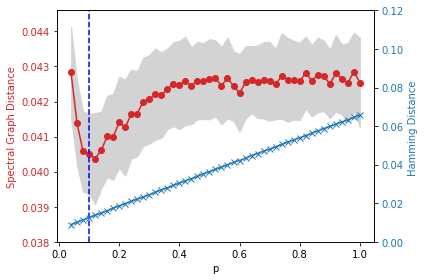

In [64]:
mean_list_ctd_ = [np.mean(spectral_distance_p0_p_Lsym_ctd[i]) for i in p]
std_list_ctd_ = [np.std(spectral_distance_p0_p_Lsym_ctd[i]) for i in p]

f.savage_plot(mean_list_ctd_[1:], p[1:],  p0, std_list_ctd_[1:], mean_hamming_dist[1:], [0.038,0.0446], [0,0.12])